# How to access and display a Sentinel-2 image through a STAC Catalog
This Jupyter Notebooks shows how to access a Sentinel-2 image through a STAC Catalog.  
One of the benefits of this is that we don't have to store the image on our end but rather fetch only what we need (e.g. Red and NIR bands to compute NDVI over a period of time).



_Author: [Akis Karagiannis](https://www.linkedin.com/in/xenofon-karagiannis/)  
Date: January 8, 2024_

In [ ]:
import pandas as pd

## Install dependencies

In [14]:
!pip install pystac-client rasterio matplotlib shapely rich

## Import Python packages

In [15]:
import pystac_client
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import shape
import geopandas as gpd
import rich.table

## Define area of intereste (coast near trieste)
- To define a different area, go to https://geojson.io/, draw an area of interest, copy-paste the coordinates and replace the ones below. (Follow instructions [here](https://support.planet.com/hc/en-us/articles/360016337117-Creating-a-GeoJSON-file).)



In [16]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [12.148145660525557, 41.752694912654704],
            [12.148145660525557, 41.63342311870409],
            [12.426292589582602, 41.63342311870409],
            [12.426292589582602, 41.752694912654704],
            [12.148145660525557, 41.752694912654704]
        ]
    ]
}

## Create a ```pystac_client.Client```
Here, we're using the STAC Catalogs published by [Element84](https://www.element84.com/).  
The catalog contains several collections (Sentinel-2 L1C, Sentinel-2L2A, Landsat-C2L2, etc)

In [17]:
catalog = pystac_client.Client.open('https://earth-search.aws.element84.com/v1/')
catalog

<Client id=earth-search-aws>

In [18]:
for collection in catalog.get_collections():
    print(collection.id)

cop-dem-glo-30
naip
sentinel-2-l2a
sentinel-2-l1c
cop-dem-glo-90
landsat-c2-l2
sentinel-1-grd
sentinel-2-c1-l2a


## Search the catalog
The more arguments we pass the more narrow our search is. If we set ```interesects``` and ```datetime``` without setting the ```collections``` argument, we will get items from all the available collections in the catalog.

In [19]:
search = catalog.search(
    intersects=area_of_interest,
    datetime=['2023-12-15T00:00:00Z', '2024-01-08T00:00:00Z'],
    collections=['sentinel-2-l2a'],
)

items = search.item_collection()
for item in items:
    print(item.id)

S2A_33TTG_20240105_0_L2A
S2A_32TQM_20240105_0_L2A
S2B_33TTG_20240103_0_L2A
S2B_32TQM_20240103_0_L2A
S2B_33TTG_20231231_0_L2A
S2B_32TQM_20231231_0_L2A
S2A_33TTG_20231229_0_L2A
S2A_32TQM_20231229_0_L2A
S2A_33TTG_20231226_0_L2A
S2A_32TQM_20231226_0_L2A
S2B_33TTG_20231224_0_L2A
S2B_32TQM_20231224_0_L2A
S2B_33TTG_20231221_0_L2A
S2B_32TQM_20231221_0_L2A
S2A_33TTG_20231219_0_L2A
S2A_32TQM_20231219_0_L2A
S2A_33TTG_20231216_0_L2A
S2A_32TQM_20231216_0_L2A


## Display results in a dataframe format

In [20]:
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df.head()

,geometry,created,platform,constellation,instruments,eo:cloud_cover,proj:epsg,mgrs:utm_zone,mgrs:latitude_band,mgrs:grid_square,...,s2:datastrip_id,s2:granule_id,s2:reflectance_conversion_factor,datetime,s2:sequence,earthsearch:s3_path,earthsearch:payload_id,earthsearch:boa_offset_applied,processing:software,updated
0,"POLYGON ((11.35497 42.39469, 11.41074 41.40774...",2024-01-05T14:22:32.939Z,sentinel-2a,sentinel-2,[msi],95.468181,32633,33,T,TG,...,S2A_OPER_MSI_L2A_DS_2APS_20240105T122650_S2024...,S2A_OPER_MSI_L2A_TL_2APS_20240105T122650_A0445...,1.034289,2024-01-05T10:09:08.401000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/33/T/T...,roda-sentinel2/workflow-sentinel2-to-stac/21ba...,True,{'sentinel2-to-stac': '0.1.1'},2024-01-05T14:22:32.939Z
1,"POLYGON ((11.43072 42.42690, 11.39347 41.43885...",2024-01-05T14:23:04.857Z,sentinel-2a,sentinel-2,[msi],95.585722,32632,32,T,QM,...,S2A_OPER_MSI_L2A_DS_2APS_20240105T122650_S2024...,S2A_OPER_MSI_L2A_TL_2APS_20240105T122650_A0445...,1.034289,2024-01-05T10:09:08.349000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/T/Q...,roda-sentinel2/workflow-sentinel2-to-stac/33ab...,True,{'sentinel2-to-stac': '0.1.1'},2024-01-05T14:23:04.857Z
2,"POLYGON ((11.35497 42.39469, 11.41069 41.40863...",2024-01-03T14:08:52.118Z,sentinel-2b,sentinel-2,[msi],99.009532,32633,33,T,TG,...,S2B_OPER_MSI_L2A_DS_2BPS_20240103T113848_S2024...,S2B_OPER_MSI_L2A_TL_2BPS_20240103T113848_A0356...,1.034219,2024-01-03T10:19:08.624000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/33/T/T...,roda-sentinel2/workflow-sentinel2-to-stac/126f...,True,{'sentinel2-to-stac': '0.1.1'},2024-01-03T14:08:52.118Z
3,"POLYGON ((11.43072 42.42690, 11.39351 41.43975...",2024-01-03T14:12:04.919Z,sentinel-2b,sentinel-2,[msi],99.036169,32632,32,T,QM,...,S2B_OPER_MSI_L2A_DS_2BPS_20240103T113848_S2024...,S2B_OPER_MSI_L2A_TL_2BPS_20240103T113848_A0356...,1.034219,2024-01-03T10:19:08.551000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/T/Q...,roda-sentinel2/workflow-sentinel2-to-stac/acb0...,True,{'sentinel2-to-stac': '0.1.1'},2024-01-03T14:12:04.919Z
4,"POLYGON ((11.35497 42.39469, 11.41074 41.40774...",2023-12-31T15:05:02.680Z,sentinel-2b,sentinel-2,[msi],81.900257,32633,33,T,TG,...,S2B_OPER_MSI_L2A_DS_2BPS_20231231T124132_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20231231T124132_A0356...,1.034035,2023-12-31T10:09:13.076000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/33/T/T...,roda-sentinel2/workflow-sentinel2-to-stac/c446...,True,{'sentinel2-to-stac': '0.1.1'},2023-12-31T15:05:02.680Z


## Select items based on cloud cover
We set a threshold of 10% cloud-cover to get almost-cloud-free images for our area of interest.

In [21]:
for item in items:
    print(f'Cloud cover for item {item.id}: {item.properties["eo:cloud_cover"]:.2f}')

Cloud cover for item S2A_33TTG_20240105_0_L2A: 95.47
Cloud cover for item S2A_32TQM_20240105_0_L2A: 95.59
Cloud cover for item S2B_33TTG_20240103_0_L2A: 99.01
Cloud cover for item S2B_32TQM_20240103_0_L2A: 99.04
Cloud cover for item S2B_33TTG_20231231_0_L2A: 81.90
Cloud cover for item S2B_32TQM_20231231_0_L2A: 81.96
Cloud cover for item S2A_33TTG_20231229_0_L2A: 100.00
Cloud cover for item S2A_32TQM_20231229_0_L2A: 100.00
Cloud cover for item S2A_33TTG_20231226_0_L2A: 86.77
Cloud cover for item S2A_32TQM_20231226_0_L2A: 87.27
Cloud cover for item S2B_33TTG_20231224_0_L2A: 78.90
Cloud cover for item S2B_32TQM_20231224_0_L2A: 79.60
Cloud cover for item S2B_33TTG_20231221_0_L2A: 18.13
Cloud cover for item S2B_32TQM_20231221_0_L2A: 17.54
Cloud cover for item S2A_33TTG_20231219_0_L2A: 0.05
Cloud cover for item S2A_32TQM_20231219_0_L2A: 0.04
Cloud cover for item S2A_33TTG_20231216_0_L2A: 0.40
Cloud cover for item S2A_32TQM_20231216_0_L2A: 0.40


In [22]:
selected_items = [item for item in items if item.properties["eo:cloud_cover"] < 10.]
selected_items

[<Item id=S2A_33TTG_20231219_0_L2A>,
 <Item id=S2A_32TQM_20231219_0_L2A>,
 <Item id=S2A_33TTG_20231216_0_L2A>,
 <Item id=S2A_32TQM_20231216_0_L2A>]

## STAC Item
A STAC Item has several properties and assets attached to it.  
Each asset points to a URL (Element84 hosts its STAC Catalog on AWS) which we can use to load it directly using rasterio (in case of GeoTIFF, JP2, etc).

In [23]:
item = selected_items[0]
item

<Item id=S2A_33TTG_20231219_0_L2A>

In [24]:
item.assets

{'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/33/T/TG/2023/12/S2A_33TTG_20231219_0_L2A/AOT.tif>,
 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/33/T/TG/2023/12/S2A_33TTG_20231219_0_L2A/B02.tif>,
 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/33/T/TG/2023/12/S2A_33TTG_20231219_0_L2A/B01.tif>,
 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/33/T/TG/2023/12/S2A_33TTG_20231219_0_L2A/granule_metadata.xml>,
 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/33/T/TG/2023/12/S2A_33TTG_20231219_0_L2A/B03.tif>,
 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/33/T/TG/2023/12/S2A_33TTG_20231219_0_L2A/B08.tif>,
 'nir08': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/33/T/TG/2023/12/S2A_33TTG_202

In [25]:
table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key         ┃ Description                     ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ aot               │ Aerosol optical thickness (AOT) │
│ blue              │ Blue (band 2) - 10m             │
│ coastal           │ Coastal aerosol (band 1) - 60m  │
│ granule_metadata  │                                 │
│ green             │ Green (band 3) - 10m            │
│ nir               │ NIR 1 (band 8) - 10m            │
│ nir08             │ NIR 2 (band 8A) - 20m           │
│ nir09             │ NIR 3 (band 9) - 60m            │
│ red               │ Red (band 4) - 10m              │
│ rededge1          │ Red edge 1 (band 5) - 20m       │
│ rededge2          │ Red edge 2 (band 6) - 20m       │
│ rededge3          │ Red edge 3 (band 7) - 20m       │
│ scl               │ Scene classification map (SCL)  │
│ swir16            │ SWIR 1 (band 11) - 20m          │
│ swir22            │ SWIR 2 (band 12) - 20m          │
│ thumbnail         │ Thumbnail image                 │
│ tileinfo_metadata │                                 │
│ visual            │ True color image                │
│ wvp               │ Water vapour (WVP)              │
│ aot-jp2           │ Aerosol optical thickness (AOT) │
│ blue-jp2          │ Blue (band 2) - 10m             │
│ coastal-jp2       │ Coastal aerosol (band 1) - 60m  │
│ green-jp2         │ Green (band 3) - 10m            │
│ nir-jp2           │ NIR 1 (band 8) - 10m            │
│ nir08-jp2         │ NIR 2 (band 8A) - 20m           │
│ nir09-jp2         │ NIR 3 (band 9) - 60m            │
│ red-jp2           │ Red (band 4) - 10m              │
│ rededge1-jp2      │ Red edge 1 (band 5) - 20m       │
│ rededge2-jp2      │ Red edge 2 (band 6) - 20m       │
│ rededge3-jp2      │ Red edge 3 (band 7) - 20m       │
│ scl-jp2           │ Scene classification map (SCL)  │
│ swir16-jp2        │ SWIR 1 (band 11) - 20m          │
│ swir22-jp2        │ SWIR 2 (band 12) - 20m          │
│ visual-jp2        │ True color image                │
│ wvp-jp2           │ Water vapour (WVP)              │
└───────────────────┴─────────────────────────────────┘

## Display the true-colour composite
The Element84 Catalog offers the "visual" asset, which is a visually enhanced true-colour composite (RGB image).

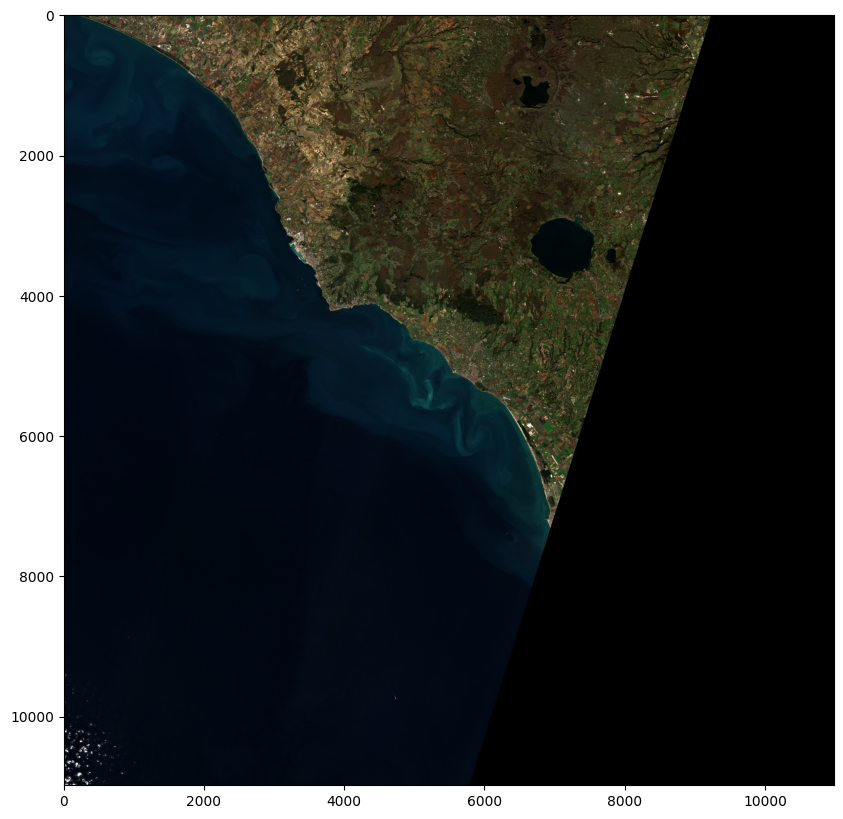

In [26]:
src = rio.open(item.assets['visual'].href)
true_colour = np.transpose(src.read(), (1, 2, 0)) # transpose axis from (num_bands, h, w) to (h, w, num_bands) for matplotlib

plt.figure(figsize=(10,10))
plt.imshow(true_colour)

## References/Resources

- https://stacspec.org/en/
- [Reading Data from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/)
